<a href="https://colab.research.google.com/github/Techbasu/master_solidity/blob/master/DominantColorExtraction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [71]:
img=cv2.imread('san-juans-feature.png')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img= cv2.resize(img,(530,306))
print(img.shape)

(306, 530, 3)


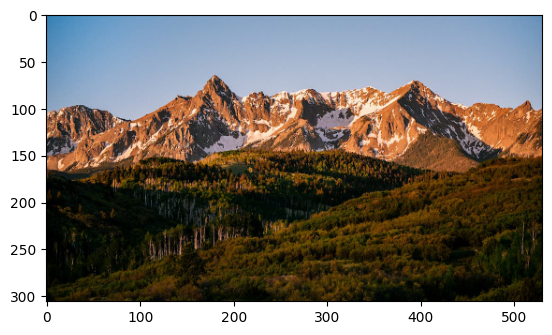

In [72]:
plt.imshow(img)
plt.show()

In [73]:
Pixels= img.reshape((-1,3))
print(Pixels)
print('\n')
print(Pixels.shape)

[[ 48 124 173]
 [ 49 125 174]
 [ 50 126 175]
 ...
 [  3   2   0]
 [  6   6   0]
 [  9   9   1]]


(162180, 3)


In [74]:
from sklearn.cluster import KMeans
k=10
model=KMeans(n_clusters=k)
model.fit(Pixels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [75]:
centroids= model.cluster_centers_
print(centroids) ## RGB matrix

[[ 46.41427844  35.42166133   8.29418825]
 [164.66872105 181.22454578 206.40074813]
 [204.69506377 123.94060948  71.04965437]
 [ 10.96481774  13.32840537   4.97373321]
 [ 58.88559927  52.59836385  50.25697961]
 [145.55763547 125.78686371 128.25681445]
 [239.9458221  201.77466307 170.12318059]
 [ 88.16824942  58.23538195  12.74245954]
 [143.61724103  87.2200634   48.11749668]
 [127.86431404 162.4444054  197.84127303]]


In [76]:
colors= np.array(centroids,dtype='uint8')
print(colors)

[[ 46  35   8]
 [164 181 206]
 [204 123  71]
 [ 10  13   4]
 [ 58  52  50]
 [145 125 128]
 [239 201 170]
 [ 88  58  12]
 [143  87  48]
 [127 162 197]]


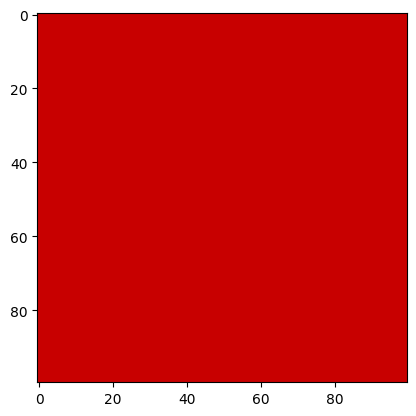

In [77]:
#Color Patch[for 1st channel]
mat=np.zeros((100,100,3),dtype='uint8')
mat[:, :, 0]=200
plt.imshow(mat)
plt.show()

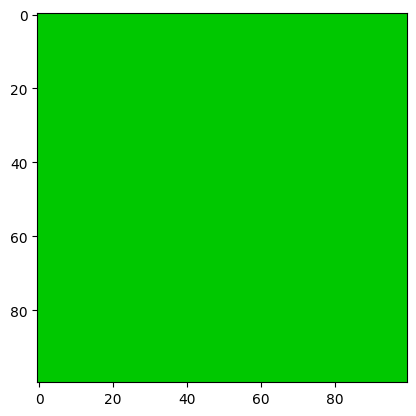

In [78]:
#Color Patch[for 2nd channel]
mat=np.zeros((100,100,3),dtype='uint8')
mat[:, :, 1]=200
plt.imshow(mat)
plt.show()

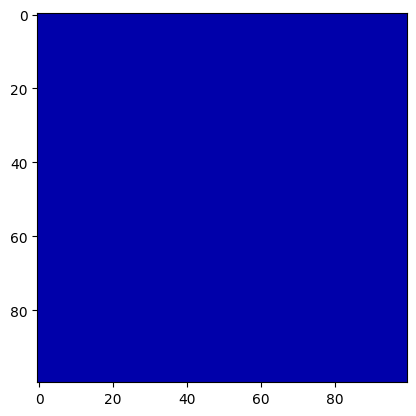

In [79]:
#Color Patch[for 3rd channel]
mat=np.zeros((100,100,3),dtype='uint8')
mat[:, :, 2]=170
plt.imshow(mat)
plt.show()

[46 35  8]
[164 181 206]
[204 123  71]
[10 13  4]
[58 52 50]
[145 125 128]
[239 201 170]
[88 58 12]
[143  87  48]
[127 162 197]


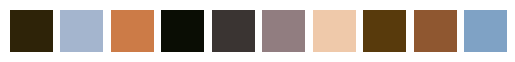

In [80]:
#color Patch
i=1
for color in colors:
  print(color)
  plt.subplot(1,k,i)
  plt.axis('off')
  i=i+1
  mat=np.zeros((100,100,3),dtype='uint8')
  mat[:, :, :]=color
  plt.imshow(mat)

plt.show()

In [81]:
# basic segmentation based on similar color regions
#segmentations partition an image into regions
# having similar visual appearance correspoinding to parts of objects
print(colors)

[[ 46  35   8]
 [164 181 206]
 [204 123  71]
 [ 10  13   4]
 [ 58  52  50]
 [145 125 128]
 [239 201 170]
 [ 88  58  12]
 [143  87  48]
 [127 162 197]]


In [82]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [83]:
model.labels_.shape

(162180,)

In [84]:
newimg= np.zeros(Pixels.shape)
print(newimg.shape)

(162180, 3)


In [85]:
for i in range(newimg.shape[0]):
  newimg[i]=colors[model.labels_[i]]

In [86]:
newimg=newimg.reshape(img.shape)
print(newimg.shape)

(306, 530, 3)


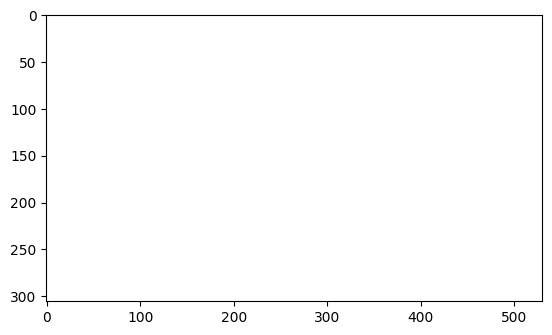

In [87]:
plt.imshow(newimg)